
# Overview, làm sạch, chuẩn hóa dữ liệu



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Global variables
raw_data = None
cleaned_data = None
transformed_data = None
features = None

In [4]:
def load_data(data_path='./data/fifa.csv'):
    """Load FIFA data from CSV"""
    global raw_data
    try:
        print("📊 Loading FIFA 19 data...")
        raw_data = pd.read_csv(data_path)
        print(f"✅ Data loaded successfully! Shape: {raw_data.shape}")
        return True
    except FileNotFoundError:
        print(f"❌ File not found: {data_path}")
        return False
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return False

In [16]:
print("🚀 Starting FIFA 19 Full Analysis Pipeline")
print("=" * 50)

load_data()
    

🚀 Starting FIFA 19 Full Analysis Pipeline
📊 Loading FIFA 19 data...
✅ Data loaded successfully! Shape: (18207, 88)


True

In [5]:
def clean_data():
    """Clean and preprocess the FIFA dataset"""
    global raw_data, cleaned_data
    
    if raw_data is None:
        print("❌ No data loaded. Call load_data() first.")
        return None
    
    print("🧹 Starting data cleaning process...")
    
    # Create a copy to avoid modifying original
    df_clean = raw_data.copy()
    
    # 1. Remove unnecessary columns
    columns_to_drop = [
        'Photo', 'Flag', 'Club Logo', 'Jersey Number', 'Loaned From', 'Real Face',
        'Release Clause', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'
    ]
    
    existing_columns = [col for col in columns_to_drop if col in df_clean.columns]
    df_clean = df_clean.drop(columns=existing_columns)
    print(f"✅ Removed {len(existing_columns)} unnecessary columns. New shape: {df_clean.shape}")
    
    # 2. Handle duplicates
    print(f"\n🔍 Checking for duplicates...")
    print(f"- Total rows: {len(df_clean):,}")
    
    # Remove exact duplicates
    initial_count = len(df_clean)
    df_clean = df_clean.drop_duplicates()
    print(f"- After removing exact duplicates: {len(df_clean):,} (removed {initial_count - len(df_clean):,})")
    
    # Handle name duplicates - keep the player with higher Overall rating
    name_duplicates = df_clean[df_clean.duplicated(subset=['Name'], keep=False)]
    if len(name_duplicates) > 0:
        print(f"- Found {len(name_duplicates)} rows with duplicate names")
        df_clean = df_clean.sort_values('Overall', ascending=False).drop_duplicates(subset=['Name'], keep='first')
        print(f"- After keeping best Overall: {len(df_clean):,}")
    
    cleaned_data = df_clean
    return df_clean

In [17]:
clean_data()

🧹 Starting data cleaning process...
✅ Removed 33 unnecessary columns. New shape: (18207, 55)

🔍 Checking for duplicates...
- Total rows: 18,207
- After removing exact duplicates: 18,207 (removed 0)
- Found 1775 rows with duplicate names
- After keeping best Overall: 17,194


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,245569,L. Watkins,18,England,47,67,Cambridge United,€60K,€1K,1285,...,34.0,46.0,35.0,44.0,47.0,13.0,7.0,14.0,10.0,8.0
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,€60K,€1K,1290,...,48.0,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,€40K,€1K,1366,...,47.0,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0
18186,240917,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,€60K,€1K,1389,...,43.0,39.0,53.0,41.0,51.0,15.0,7.0,14.0,6.0,8.0


In [7]:
def convert_currency(value):
    """Convert FIFA currency format to numeric value"""
    if pd.isna(value) or value == '0':
        return 0
    
    try:
        value_str = str(value).replace('€', '').replace(',', '')
        
        if 'M' in value_str:
            return int(float(value_str.replace('M', '')) * 1000000)
        elif 'K' in value_str:
            return int(float(value_str.replace('K', '')) * 1000)
        else:
            return int(float(value_str))
    except (ValueError, AttributeError):
        return 0

def convert_height(height):
    """Convert height from feet to centimeters"""
    if pd.isna(height):
        return 175
    
    try:
        height_str = str(height).replace("'", ".")
        feet = float(height_str)
        cm = round(feet * 12 * 2.54)
        return cm
    except (ValueError, AttributeError):
        return 175

def convert_weight(weight):
    """Convert weight from lbs to kg"""
    if pd.isna(weight):
        return 75
    
    try:
        weight_str = str(weight).replace('lbs', '')
        lbs = float(weight_str)
        kg = round(lbs * 0.453592)
        return kg
    except (ValueError, AttributeError):
        return 75

def extract_year(date_str):
    """Extract year from date string"""
    if pd.isna(date_str):
        return 2020
    
    try:
        year_str = str(date_str)[-4:]
        year = int(year_str)
        
        if 1900 <= year <= 2030:
            return year
        else:
            return 2020
    except (ValueError, AttributeError):
        return 2020

In [8]:
def transform_data():
    """Apply data transformations"""
    global cleaned_data, transformed_data
    
    if cleaned_data is None:
        print("❌ No cleaned data. Call clean_data() first.")
        return None
    
    print("🔄 Starting data transformations...")
    
    df_transformed = cleaned_data.copy()
    
    # 1. Transform currency columns
    print("💰 Converting currency columns...")
    df_transformed['Value'] = df_transformed['Value'].apply(convert_currency)
    df_transformed['Wage'] = df_transformed['Wage'].apply(convert_currency)
    
    # 2. Transform physical attributes
    print("📏 Converting height and weight...")
    df_transformed['Height'] = df_transformed['Height'].apply(convert_height)
    df_transformed['Weight'] = df_transformed['Weight'].apply(convert_weight)
    
    # 3. Transform date columns
    print("📅 Converting date columns...")
    df_transformed['Joined'] = df_transformed['Joined'].apply(extract_year)
    df_transformed['Contract Valid Until'] = df_transformed['Contract Valid Until'].apply(extract_year)
    
    # 4. Handle missing values
    print("🔧 Handling missing values...")
    
    # Categorical columns
    categorical_fill = {
        'Club': 'No Club',
        'Position': 'ST',
        'Preferred Foot': 'Right',
        'Work Rate': 'Medium/ Medium',
        'Body Type': 'Normal'
    }
    
    for col, fill_value in categorical_fill.items():
        if col in df_transformed.columns:
            df_transformed[col] = df_transformed[col].fillna(fill_value)
    
    # Clean up Body Type values
    body_type_mapping = {
        'C. Ronaldo': 'Normal',
        'Courtois': 'Normal',
        'Messi': 'Normal',
        'Neymar': 'Normal',
        'PLAYER_BODY_TYPE_25': 'Normal',
        'Shaqiri': 'Normal',
        'Akinfenwa': 'Normal',
        'normal': 'Normal'
    }
    
    df_transformed['Body Type'] = df_transformed['Body Type'].replace(body_type_mapping)
    
    # Numeric columns - fill with median
    numeric_columns = df_transformed.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if col in df_transformed.columns:
            median_val = df_transformed[col].median()
            df_transformed[col] = df_transformed[col].fillna(median_val)
    
    # 5. Convert data types
    print("🔄 Converting data types...")
    
    # Convert rating columns to int
    rating_columns = [
        'International Reputation', 'Weak Foot', 'Skill Moves',
        'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
        'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
        'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
        'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
        'Strength', 'LongShots', 'Aggression', 'Interceptions',
        'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
        'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
        'GKKicking', 'GKPositioning', 'GKReflexes'
    ]
    
    for col in rating_columns:
        if col in df_transformed.columns:
            df_transformed[col] = df_transformed[col].astype('int64')
    
    print("✅ Data transformations completed!")
    transformed_data = df_transformed
    return df_transformed

In [18]:
transform_data()


🔄 Starting data transformations...
💰 Converting currency columns...
📏 Converting height and weight...
📅 Converting date columns...
🔧 Handling missing values...
🔄 Converting data types...
✅ Data transformations completed!


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,2202,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,2228,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,2143,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000,260000,1471,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,2281,...,79,88,68,58,51,15,13,5,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18190,245569,L. Watkins,18,England,47,67,Cambridge United,60000,1000,1285,...,34,46,35,44,47,13,7,14,10,8
18189,240160,A. Kaltner,18,Germany,47,61,SpVgg Unterhaching,60000,1000,1290,...,48,37,28,15,22,15,5,14,12,8
18187,240158,C. Ehlich,19,Germany,47,59,SpVgg Unterhaching,40000,1000,1366,...,47,47,40,42,42,13,12,11,15,12
18186,240917,Zhang Yufeng,20,China PR,47,64,Beijing Renhe FC,60000,1000,1389,...,43,39,53,41,51,15,7,14,6,8


In [9]:
def create_visualizations():
    """Create basic visualizations"""
    global transformed_data
    
    if transformed_data is None:
        print("❌ No transformed data available for visualization")
        return
    
    print("📊 Creating visualizations...")
    
    df = transformed_data
    
    # 1. Overall distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['Overall'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Overall Rating Distribution')
    plt.xlabel('Overall Rating')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 2. Age distribution
    plt.figure(figsize=(10, 6))
    plt.hist(df['Age'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 3. Top nationalities
    plt.figure(figsize=(12, 8))
    top_nationalities = df['Nationality'].value_counts().head(10)
    plt.barh(range(len(top_nationalities)), top_nationalities.values, color='coral')
    plt.yticks(range(len(top_nationalities)), top_nationalities.index)
    plt.title('Top 10 Nationalities')
    plt.xlabel('Number of Players')
    plt.show()
    
    # 4. Overall vs Age scatter
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Age'], df['Overall'], alpha=0.6, color='purple')
    plt.title('Overall Rating vs Age')
    plt.xlabel('Age')
    plt.ylabel('Overall Rating')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print("✅ Visualizations completed!")

📊 Creating visualizations...


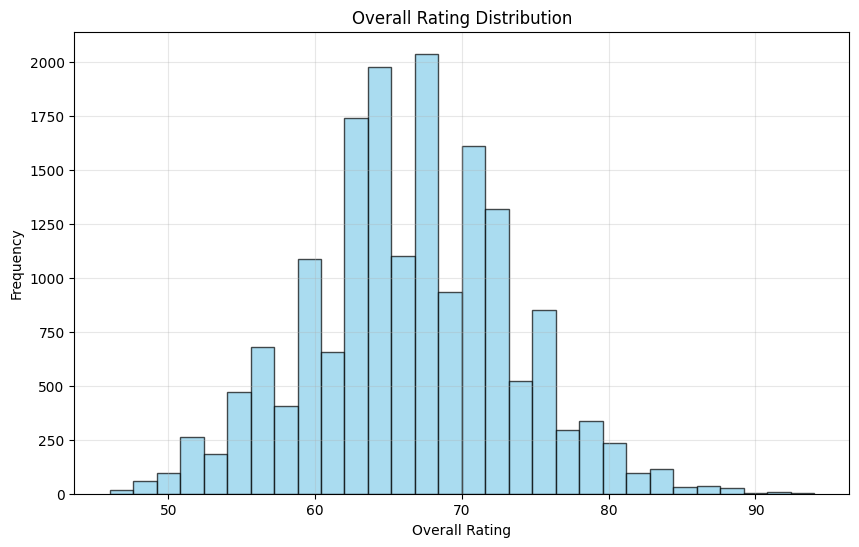

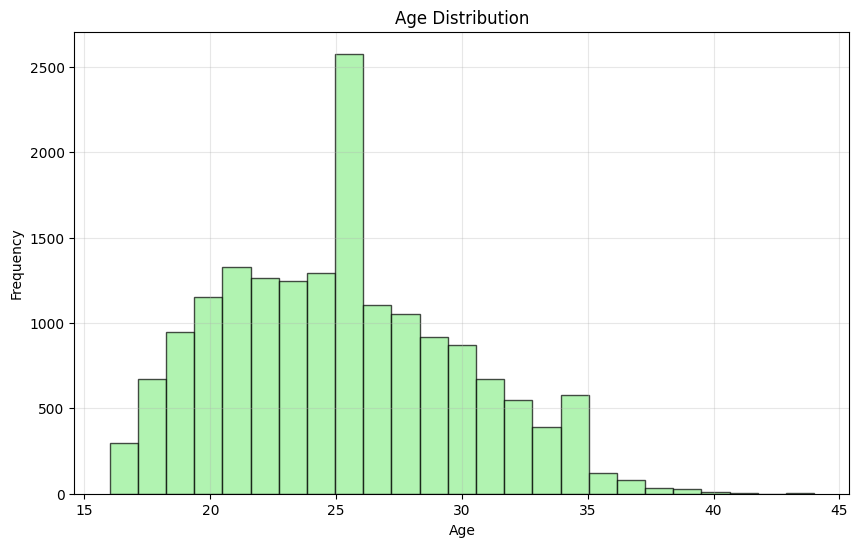

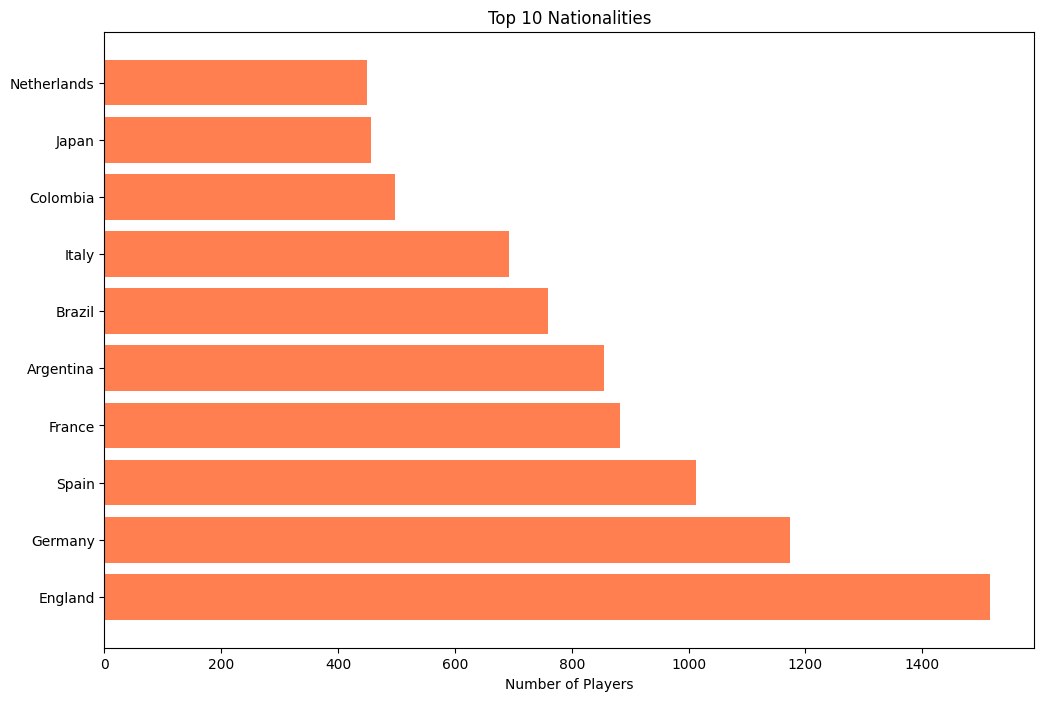

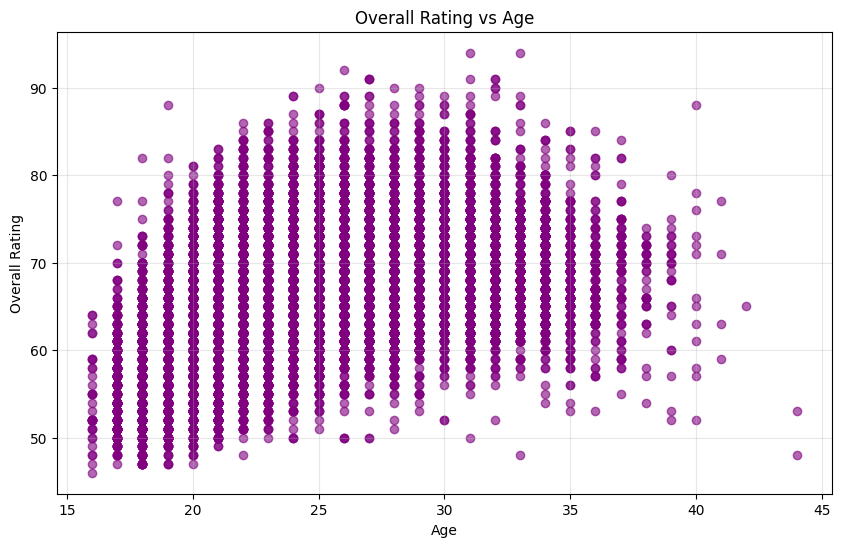

✅ Visualizations completed!


In [19]:
create_visualizations()

In [10]:
def prepare_ml_data():
    """Prepare data for machine learning"""
    global transformed_data, features
    
    if transformed_data is None:
        print("❌ No transformed data. Call transform_data() first.")
        return None, None, None
    
    print("🤖 Preparing data for machine learning...")
    
    # Select features based on correlation analysis
    important_features = [
        'Reactions', 'Potential', 'Age', 'International Reputation', 
        'Skill Moves', 'Finishing', 'Dribbling', 'BallControl',
        'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
        'Aggression', 'Interceptions', 'Positioning', 'Vision',
        'Penalties', 'Composure', 'Marking', 'StandingTackle',
        'SlidingTackle', 'Value', 'Wage', 'Special'
    ]
    
    # Filter existing features
    existing_features = [col for col in important_features if col in transformed_data.columns]
    
    # Prepare X and y
    X = transformed_data[existing_features]
    y = transformed_data['Overall']
    
    print(f"✅ ML data prepared with {len(existing_features)} features")
    print(f"Features: {existing_features}")
    
    features = existing_features
    return X, y, existing_features

In [20]:
X, y, features = prepare_ml_data()

🤖 Preparing data for machine learning...
✅ ML data prepared with 29 features
Features: ['Reactions', 'Potential', 'Age', 'International Reputation', 'Skill Moves', 'Finishing', 'Dribbling', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'Value', 'Wage', 'Special']


In [21]:
def train_manual_model(X, y):
    """Train manual linear regression model"""
    print("📊 Training manual linear regression...")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Add bias term
    X_train_bias = np.column_stack((np.ones(X_train_scaled.shape[0]), X_train_scaled))
    X_test_bias = np.column_stack((np.ones(X_test_scaled.shape[0]), X_test_scaled))
    
    try:
        # Calculate coefficients: w = (X^T X)^(-1) X^T y
        w_manual = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train)
        
        # Predictions
        y_pred_manual = X_test_bias.dot(w_manual)
        
        # Metrics
        r2_manual = r2_score(y_test, y_pred_manual)
        rmse_manual = np.sqrt(mean_squared_error(y_test, y_pred_manual))
        
        print(f"✅ Manual model - R²: {r2_manual:.4f}, RMSE: {rmse_manual:.4f}")
        
        return {
            'coefficients': w_manual,
            'predictions': y_pred_manual,
            'r2': r2_manual,
            'rmse': rmse_manual,
            'scaler': scaler
        }
        
    except np.linalg.LinAlgError:
        print("❌ Manual model failed due to singular matrix")
        return None

In [12]:
def train_sklearn_model(X, y):
    """Train sklearn linear regression model"""
    print("📊 Training sklearn linear regression...")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"✅ Sklearn model - R²: {r2:.4f}, RMSE: {rmse:.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(model.coef_)
    }).sort_values('Importance', ascending=False)
    
    return {
        'model': model,
        'predictions': y_pred,
        'r2': r2,
        'rmse': rmse,
        'scaler': scaler,
        'feature_importance': feature_importance,
        'X_test': X_test,
        'y_test': y_test
    }

In [22]:
# Train models
manual_results = train_manual_model(X, y)
sklearn_results = train_sklearn_model(X, y)

📊 Training manual linear regression...
✅ Manual model - R²: 0.9239, RMSE: 1.9110
📊 Training sklearn linear regression...
✅ Sklearn model - R²: 0.9239, RMSE: 1.9110


In [13]:
def save_results():
    """Save processed data and results"""
    global transformed_data, features
    
    if transformed_data is None:
        print("❌ No transformed data to save")
        return
    
    print("💾 Saving results...")
    
    try:
        # Save processed data
        transformed_data.to_csv('processed_data.csv', index=False)
        print("✅ Processed data saved to 'processed_data.csv'")
        
        # Save app-specific data
        app_data = transformed_data[['Name', 'Overall', 'Potential', 'Age', 
                                   'International Reputation', 'Skill Moves', 
                                   'Reactions', 'Value', 'Wage', 'Nationality', 'Club', 'Position']].copy()
        app_data.to_csv('app_data.csv', index=False)
        print("✅ App data saved to 'app_data.csv'")
        
    except Exception as e:
        print(f"❌ Error saving results: {e}")

In [ ]:
save_results()

💾 Saving results...
✅ Processed data saved to 'processed_data.csv'
✅ App data saved to 'app_data.csv'
